<a href="https://colab.research.google.com/github/vikas6050/NLP-24/blob/main/Count_vectorizer_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [26]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


File ‘bbc_text_cls.csv’ already there; not retrieving.



In [28]:
df= pd.read_csv('bbc_text_cls.csv')

In [29]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


Supervised task as the avel are provided

In [30]:
inputs = df['text']
labels = df['labels']

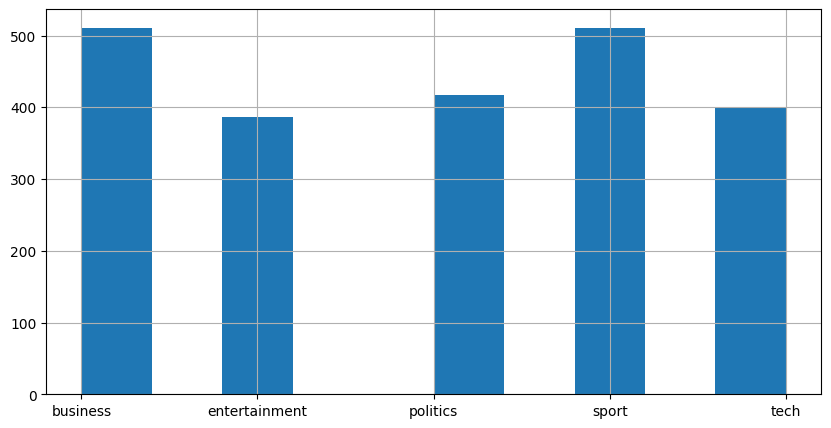

In [31]:
labels.hist(figsize = (10,5));

In [32]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels,random_state =123)

In [33]:
vectorizer = CountVectorizer()

In [34]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [35]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [36]:
(Xtrain !=0).sum()

337411

What percentage of value are non zero

In [37]:
(Xtrain != 0).sum() /np.prod(Xtrain.shape)

0.007695239935415004

In [39]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train_score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train_score: 0.9922062350119905
test score: 0.9712746858168761


Making the model with the stopword

In [40]:
# with stopword
vectorizer = CountVectorizer(stop_words ='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118
